In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch import optim
from torch.autograd import Variable
from torch.utils.data.sampler import SubsetRandomSampler

In [4]:
import helpers_self

In [5]:
cpu_device = 'cpu'
cpu_device

gpu_device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
gpu_device

'cpu'

device(type='cuda', index=0)

In [6]:
eval_size = 0.2
batch_size = 32
num_workers = 0

In [7]:
transform = transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                           ])

In [8]:
train_dataset = datasets.FashionMNIST(root = 'data',
                                       train = True,
                                       download = True,
                                       transform = transform)

test_dataset = datasets.FashionMNIST(root = 'data',
                                       train = True,
                                       download = True,
                                       transform = transform)

In [9]:
train_dataset_len = len(train_dataset)
train_dataset_len

60000

In [10]:
indices = list(range(train_dataset_len))
indices[:5]

[0, 1, 2, 3, 4]

In [11]:
np.random.shuffle(indices)
indices[:5]

[22934, 10748, 15777, 17569, 40359]

In [12]:
split = int(np.floor(train_dataset_len * eval_size))
train_idx, eval_idx = indices[split:], indices[:split]

In [13]:
len(train_idx)

48000

In [14]:
len(eval_idx)

12000

In [15]:
train_sampler = SubsetRandomSampler(train_idx)
eval_sampler = SubsetRandomSampler(eval_idx)

In [16]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           sampler = train_sampler,
                                           num_workers = num_workers
                                          )

eval_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          sampler = eval_sampler,
                                          num_workers = num_workers
                                         )

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False,
                                          num_workers = num_workers,
                                          
                                          
                                         )

In [17]:
# specify the image classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [18]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [19]:
type(images)
images.shape

torch.Tensor

torch.Size([32, 1, 28, 28])

In [20]:
images.shape

torch.Size([32, 1, 28, 28])

In [21]:
type(labels)
labels.shape
labels

torch.Tensor

torch.Size([32])

tensor([0, 7, 7, 1, 8, 2, 2, 9, 4, 7, 5, 6, 1, 0, 4, 9, 8, 2, 1, 9, 6, 6, 2, 5,
        3, 1, 7, 7, 6, 2, 9, 7])

In [22]:
#labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[1] = 'Testing'

#ax.set_xticklabels(labels)

In [23]:
InteractiveShell.ast_node_interactivity = 'none'

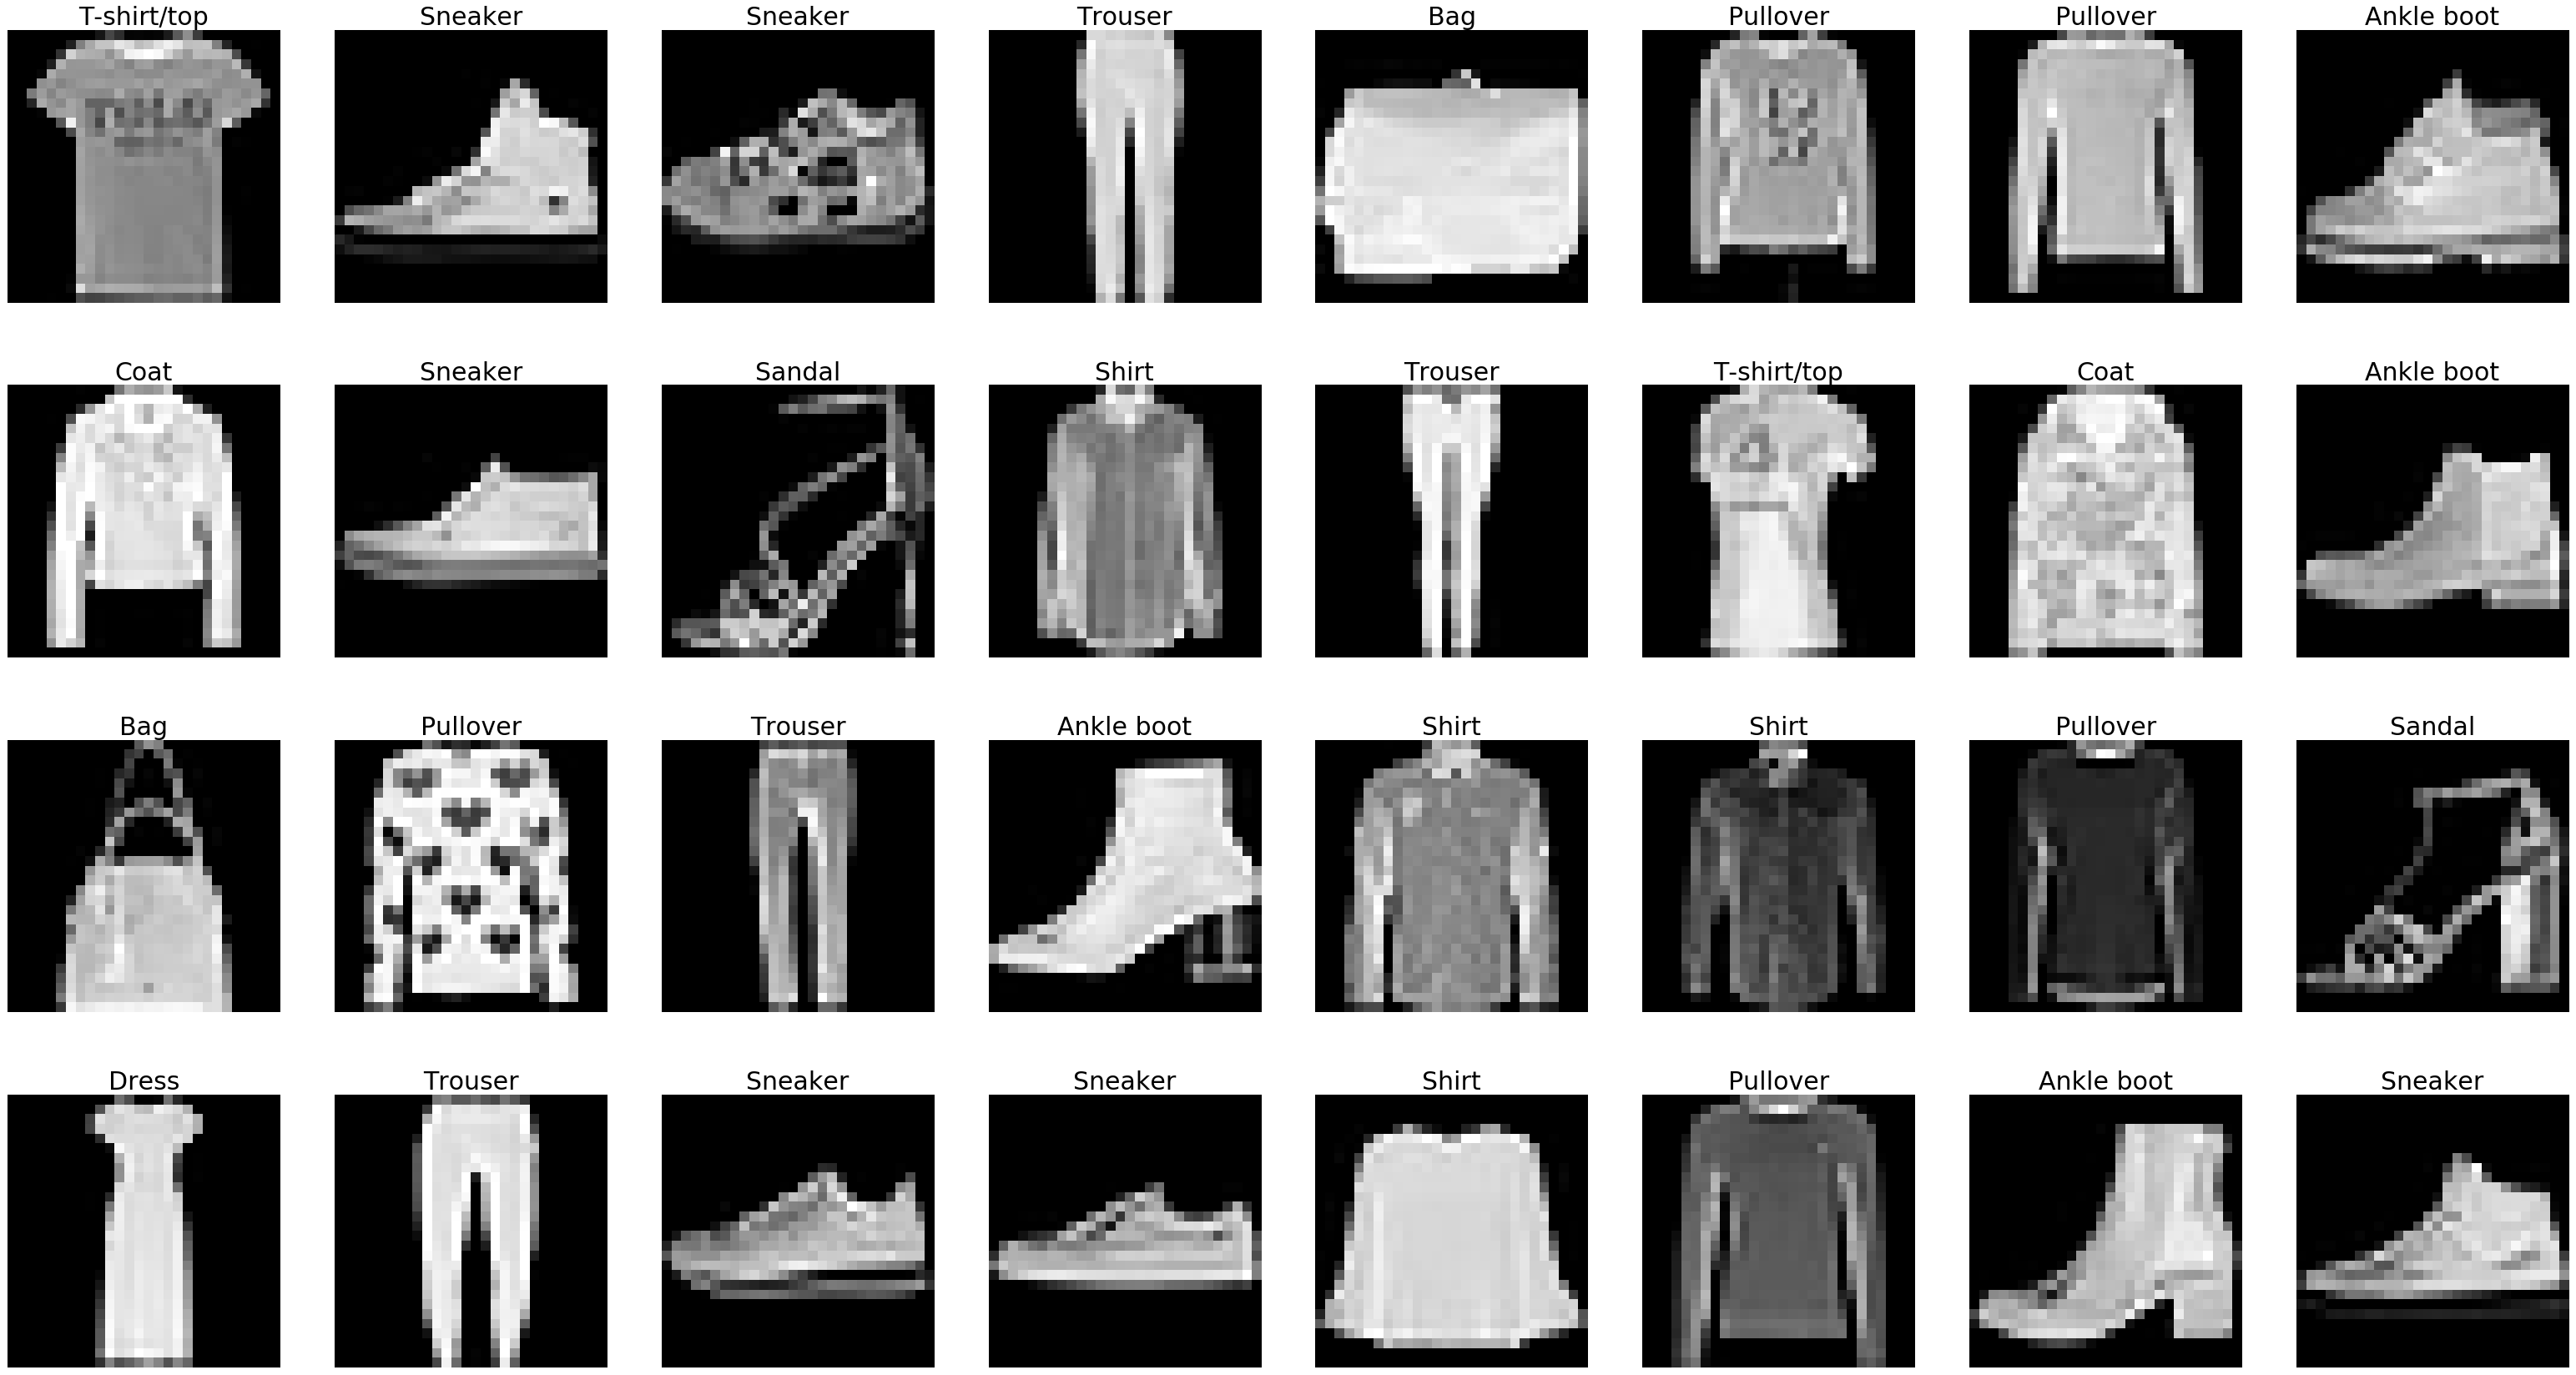

In [24]:
plt.figure(figsize = (55, 30))
for idx in range(batch_size):
    ax = plt.subplot(4, 8, idx + 1, xticks = [], yticks = [])
    helpers_self.imshow(ax, images[idx, :], classes[labels[idx].item()])